# MATSCI 142 figures

_Authors: Enze Chen_

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from scipy.special import hermite

## Double slit pattern

In [ ]:
theta = np.linspace(-np.pi, np.pi, 500);
I = 4 * ((np.sin(np.pi * np.sin(theta)) / (np.pi * np.sin(theta))) ** 2) * ((np.cos(3 * np.pi * np.sin(theta))) ** 2);
g1 = 0.8 * np.exp(-(theta + 0.5) ** 2 / 0.31) + 1.5;
g2 = 0.8 * np.exp(-(theta - 0.5) ** 2 / 0.31) + 1.5;
base1 = np.linspace(1.49, 1.49, 500);
base2 = np.linspace(-0.01, -0.01, 500);
colx1 = np.linspace(-np.pi, -0.6, 150);
colx2 = np.linspace(-0.4, 0.4, 150); 
colx3 = np.linspace(0.6, np.pi, 150); 
coll = np.linspace(3, 3, 150);

wavex = np.linspace(-1, 1, 300);
wave1 = np.linspace(4.0, 4.0, 300);
wave2 = np.linspace(4.4, 4.4, 300);
wave3 = np.linspace(4.8, 4.8, 300);
wave4 = np.linspace(5.2, 5.2, 300);

fig, ax = plt.subplots()
ax.plot(theta, I/np.max(I), lw=3)
ax.plot(theta, np.vstack([g1, g2]).T, lw=1);
ax.plot(theta, base1, c='k', lw=1);
ax.plot(theta, base2, c='k', lw=2.5);
ax.plot(np.vstack([colx1, colx2, colx3]).T, coll, 'k', lw=4)
ax.plot(wavex, np.vstack([wave1, wave2, wave3, wave4]).T, c='b', lw=1.5);
ax.annotate('', (0, 3.4), (0, 4), arrowprops=dict(arrowstyle="simple", facecolor='b', edgecolor='blue'))
ax.set(xticks=[], yticks=[], xlim=[-1.57, 1.57], ylim=[-0.01, 5.22])
ax.axis('off')
plt.show()

## Probability density function

In [ ]:
x = np.linspace(-2, 1, 10000)
y = np.cos(2 * x) + np.sin(3 * x) + 0.708
lower, upper = (-0.2, 0.75)
idx = (x > lower) & (x < upper);

fig, ax = plt.subplots()
ax.plot(x, y, lw=2.5, zorder=5)
ax.fill_between(x[idx], y[idx], color='lightgray', zorder=-5)
ax.annotate("$a$", (lower, -0.03), va='top', ha='center', fontsize=24, annotation_clip=False)
ax.annotate("$b$", (upper, -0.03), va='top', ha='center', fontsize=24, annotation_clip=False)
ax.annotate("$|\Psi(x,t)|^2$", (-0.3, 1), ha='right', fontsize=24, annotation_clip=False)
ax.set(xticks=[], yticks=[], ylim=[0,2.5])
ax.spines[['left']].set_visible(False)
plt.show()
fig.savefig("prob-density.pdf")

## Stationary states

In [ ]:
x = np.linspace(0, np.pi, 10000)
p1 = np.sin(x)
p2 = np.sin(2*x)
p3 = np.sin(3*x)
state = 1

fig, ax = plt.subplots()
if state == 1:
    pp = p1
elif state == 2:
    pp = p2
else:
    pp = p3
ax.plot([0, 0], [-0.4, 1.1], c='k', lw=1)
ax.plot([-0.4, 3.3], [0, 0], c='k', lw=1)
ax.plot(x, pp, lw=3.5, zorder=5)
ax.set(xlim=[-0.5, 3.3], ylim=[-1.1, 1.1], xticks=[], yticks=[])
ax.axis('off')
ax.annotate(f"$\psi_{state}(x)$", (-0.6, 0.9), fontsize=20, annotation_clip=False)
plt.show()
fig.savefig(f"ss-{state}.pdf")

## Quantum dot

In [ ]:
x = np.linspace(0, 10, 10000)
y1 = np.exp(-(x - 1.5) ** 2)
y2 = np.exp(-(x - 4.0) ** 2)
y3 = np.exp(-(x - 6.5) ** 2)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x, y1, 'b', lw=3)
ax.plot(x, y2, 'g', lw=3)
ax.plot(x, y3, 'r', lw=3)
ax.set(xlim=[-0.01, 8], ylim=[-0.01, 1.05], xticks=[], yticks=[], ylabel='Intensity (a.u.)', xlabel='Wavelength of light ($\lambda$)')
ax.annotate('2 nm', (1.9, 0.95))
ax.annotate('3 nm', (4.4, 0.95))
ax.annotate('5 nm', (6.9, 0.95))
plt.show()
fig.savefig("quantum-dot-plot.pdf")

## Kronig-Penney model

In [ ]:
# Constants
a = 2e-10
Emax = 100 * 1.6e-19
hbar = 1.055e-34
mass = 9.11e-31

E = np.linspace(0, Emax, 100000)
mu = 10 ** 0.5
k = np.sqrt(2 * mass * E) / hbar
rhs = np.cos(k * a) + mu * np.sin(k * a) / (k * a);

q = np.arccos(rhs)
ind1 = np.arange(3300, 9421)
ind2 = np.arange(17887, 37700)
ind3 = np.arange(48119, 84785)
E = E / 1.6e-19

# fig, ax = plt.subplots()
# ax.plot( q[ind1], E[ind1], c='C0', lw=3)
# ax.plot(-q[ind1], E[ind1], c='C0', lw=3)
# ax.plot( q[ind2], E[ind2], c='C0', lw=3)
# ax.plot(-q[ind2], E[ind2], c='C0', lw=3)
# ax.plot( q[ind3], E[ind3], c='C0', lw=3)
# ax.plot(-q[ind3], E[ind3], c='C0', lw=3)
# ax.set(xlabel='$q$', ylabel='Energy', xlim=[-np.pi-0.2, np.pi+0.2], ylim=[0, 90], yticks=[])
# ax.set(xticks=[-np.pi, 0, np.pi], xticklabels=["$-\pi/d$", "$0$", "$\pi/d$"])
# ax.vlines([-np.pi, 0, np.pi], 0, 90, ls='dashed', color='gray', lw=1.5, zorder=-3)
# plt.show()
# fig.savefig("E-vs-q-2.pdf")

fig, ax = plt.subplots()
ax.plot(q[ind1], E[ind1], c='C0', lw=3)
ax.plot(q[ind2] + np.pi, np.flip(E[ind2]), c='C0', lw=3)
ax.plot(q[ind3] + 2*np.pi, E[ind3], c='C0', lw=3)
ax.set(xlabel='$q$', ylabel='Energy', xlim=[0, 3*np.pi+0.2], ylim=[0, 90], yticks=[])
ax.set(xticks=[0, np.pi, 2*np.pi, 3*np.pi], xticklabels=["$0$", "$\pi/d$", "$2\pi/d$", "$3\pi/d$"])
ax.vlines([np.pi, 2*np.pi, 3*np.pi], 0, 90, ls='dashed', color='gray', lw=1.5, zorder=-3)
plt.show()
fig.savefig("E-vs-q-1.pdf")

## Parabolic potential

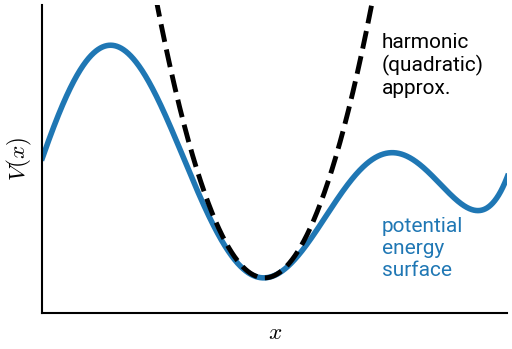

In [12]:
x = np.linspace(-1, 9, 10000)
y = 0.7 * np.sin((x + 1.7)/2) + np.cos(x - 0.3) + 0.03 * np.exp(x - 5)
z = 0.5 * (x - 3.774) ** 2 - 0.661

fig, ax = plt.subplots()
ax.plot(x, y, lw=4)
ax.plot(x, z, 'k--', lw=3.5)
ax.set(xlim=[-1, 9], ylim=[-1, 2], xticks=[], yticks=[], xlabel='$x$', ylabel='$V(x)$')
ax.annotate("potential\nenergy\nsurface", (0.73, 0.12), xycoords="axes fraction", c="C0", fontsize=15)
ax.annotate("harmonic\n(quadratic)\napprox.", (0.73, 0.71), xycoords="axes fraction", c="k", fontsize=15)
plt.show()
fig.savefig("qpot-min.pdf")

## Hermite polynomials

In [ ]:
a = 0.036
x = np.linspace(-a, a, 1000)
m = 9e-31
w = 1e1
hbar = 1e-34
C = (m * w / (np.pi * hbar)) ** 0.25
q = np.sqrt(m * w / hbar)
n = 50
psi = hermite(n)
# psi = hermiteH(n, q*x) .* exp(-q^2*x.^2/2);
# psi = C * 1/(sqrt(2^n*factorial(n))) * hermiteH(n, q*x) .* exp(-q^2*x.^2/2);
prob = (psi(q * x) * np.exp(-q**2 * x**2 / 2)) ** 2;

fig, ax = plt.subplots()
ax.plot(x, prob, lw=2);
ax.set(xlim=[-1.1*a, 1.1*a], ylim=[0, 1.1*max(prob)], xticks=[], yticks=[], xlabel='$x$', ylabel='$|\psi_{50}(x)|^2$')
plt.show()
fig.savefig("hermite.pdf")

## Casimir effect

In [ ]:
x = np.linspace(-10, 10, 10000)
y = np.zeros([5, len(x)])
y[0,:] = np.sin(5.0 * x) + 12
y[1,:] = np.sin(4.0 * x) + 9
y[2,:] = np.sin(2.0 * x) + 6
y[3,:] = np.sin(0.9 * x) + 3
y[4,:] = np.sin(0.5 * x)
left = x <= 0
right = x >= np.pi

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x, y[:3, :].T, c="C1", lw=3)
ax.plot(x[left], y[3:, left].T, c="C1", lw=3)
ax.plot(x[right], y[3:, right].T, c="C1", lw=3)
ax.plot([0, 0], [-2, 14.5], c='C0', lw=4)
ax.plot([np.pi, np.pi], [-2, 14.5], c='C0', lw=4)
ax.plot([-5*np.pi/4, -5*np.pi/4], [4, 5], c='k', lw=1.5)
ax.plot([-np.pi/4, -np.pi/4], [4, 5], c='k', lw=1.5)
ax.set(xlim=[-4.5, np.pi+4.5], ylim=[-5, 17], xticks=[], yticks=[])
ax.spines[['left', 'bottom']].set_visible(False)

ax.annotate("Casimir plates", (np.pi/2, -4.5), ha='center', c='C0', fontsize=20, annotation_clip=False)
ax.annotate("vacuum\nfluctuations", (4, 14.5), fontsize=18, c='C1', annotation_clip=False)
ax.annotate("$d$", (1.33, 15))
ax.annotate('', (0, 14), (np.pi, 14), arrowprops=dict(arrowstyle="<->"))
ax.annotate("$\lambda$", (-2.5, 3))
ax.annotate('', (-5*np.pi/4, 4.5), (-np.pi/4, 4.5), arrowprops=dict(arrowstyle="<->"))
ax.annotate("$\lambda > d$", (4, -2))
ax.annotate('', (0, 1.6), (-1.5, 1.6), arrowprops=dict(arrowstyle="simple", mutation_scale=50, facecolor='C2', edgecolor='C2'))
ax.annotate('', (np.pi, 1.6), (np.pi+1.5, 1.6), arrowprops=dict(arrowstyle="simple", mutation_scale=50, facecolor='C2', edgecolor='C2'))
plt.show()
fig.savefig("casimir.pdf")

## Phonon modes

In [ ]:
x = np.linspace(0, np.pi, 10000)
m1 = 7
m2 = 10
C = 100
k = 0.1
d = 1
y1 = np.sqrt(C / (m1 * m2) * (m1 + m2 + np.sqrt(m1**2 + m2**2 + 2*m1*m2 * np.cos(x * d))))
y2 = np.sqrt(C / (m1 * m2) * (m1 + m2 - np.sqrt(m1**2 + m2**2 + 2*m1*m2 * np.cos(x * d))))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y1, lw=5)
ax.plot(x, y2, lw=5)
ax.set(xlim=[0, np.pi], ylim=[0, 7.2], xlabel='$k$', ylabel='$\omega(k)$', xticks=[], yticks=[])

ax.annotate("optical", (0.5, 5.8), c="C0")
ax.annotate("acoustic", (0.5, 2.5), c="C1")
ax.annotate("$\pi/d$", (np.pi, -0.1), va='top', ha='center', annotation_clip=False, fontsize=17)
# txt1 = 'optical';
# txt2 = 'acoustic';
# txt3 = '\pi/d';
# text(0.5, 6, txt1, 'fontsize', 28, 'color', colord(1,:));
# text(0.5, 3, txt2, 'fontsize', 28, 'color', colord(2,:));
# text(pi-0.2, -0.5, txt3, 'fontsize', 28);
plt.show()
fig.savefig("phonon-modes.pdf")